In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
def create_cube():
    return np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                     [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

In [3]:
def translation(shape, tx, ty, tz):
    return shape + np.array([tx, ty, tz])

In [4]:
def rotation_x(shape, angle_deg):
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([[1, 0, 0], [0, np.cos(angle_rad), -np.sin(angle_rad)], [0, np.sin(angle_rad), np.cos(angle_rad)]])
    return np.dot(shape, rotation_matrix.T)

In [5]:
def scaling(shape, sx, sy, sz):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, sz]])
    return np.dot(shape, scaling_matrix.T) 

In [6]:
def shearing(shape, shxy, shxz, shyx, shyz, shzx, shzy):
    shear_matrix = np.array([[1, shxy, shxz], [shyx, 1, shyz], [shzx, shzy, 1]])
    return np.dot(shape, shear_matrix.T)

In [7]:
def reflection(shape, axis):
    reflection_matrices = {
        'xy': np.array([[1, 0, 0], [0, 1, 0], [0, 0, -1]]),
        'xz': np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]]),
        'yz': np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    }
    return np.dot(shape, reflection_matrices[axis].T)

In [38]:
def plot_shapes(original, translated, rotated, scaled, sheared, reflected):
    fig = plt.figure(figsize=(10, 8))  # Increase figure size
    ax = fig.add_subplot(111, projection='3d')
    
    def draw_cube(ax, shape, color, label):
        vertices = [[shape[0], shape[1], shape[2], shape[3]],
                    [shape[4], shape[5], shape[6], shape[7]],
                    [shape[0], shape[1], shape[5], shape[4]],
                    [shape[2], shape[3], shape[7], shape[6]],
                    [shape[1], shape[2], shape[6], shape[5]],
                    [shape[4], shape[7], shape[3], shape[0]]]
        ax.add_collection3d(Poly3DCollection(vertices, facecolors=color, linewidths=1, edgecolors='k', alpha=0.6, label=label))
    
    draw_cube(ax, original, 'blue', 'Original')
    draw_cube(ax, translated, 'red', 'Translated')
    draw_cube(ax, rotated, 'green', 'Rotated')
    draw_cube(ax, scaled, 'purple', 'Scaled')
    draw_cube(ax, sheared, 'orange', 'Sheared')
    draw_cube(ax, reflected, 'cyan', 'Reflected')
    
    # Set view limits to match the reference image
    ax.set_xlim(-1.0, 3.0)
    ax.set_ylim(-1.0, 2.0)
    ax.set_zlim(-1.0, 3.0)
    
    # Adjust the view angle to match reference image
    ax.view_init(elev=20, azim=-45)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Add legend in top-left corner
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
    
    plt.title('3D Geometric Transformations')
    plt.tight_layout()  # Improve spacing
    plt.show()

In [39]:
def main():
    cube = create_cube()
    translated_cube = translation(cube, 2, 1, 2)
    rotated_cube = rotation_x(cube, 180)
    scaled_cube = scaling(cube, 1,2,0.5)
    sheared_cube = shearing(cube, 1, 0, 0, 1, 0, 0)
    reflected_cube = reflection(cube, 'yz')

    plot_shapes(cube, translated_cube, rotated_cube, scaled_cube, sheared_cube, reflected_cube)

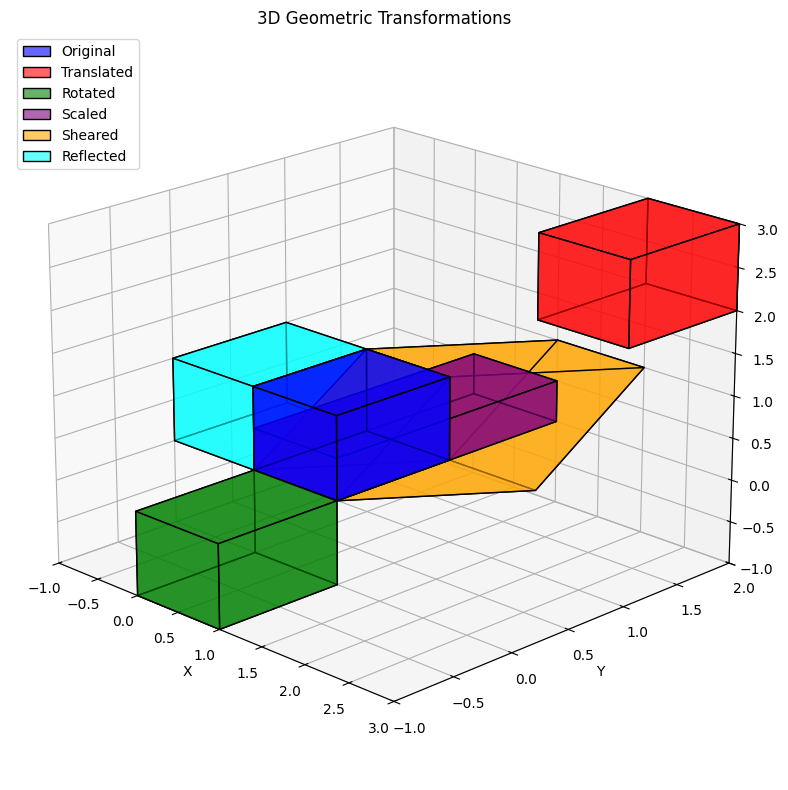

In [40]:
if __name__ == "__main__":
    main()